In [4]:
# Task 1,2
import pandas as pd
df = pd.read_csv("lab2_data.csv",sep=";",parse_dates=["data"],dayfirst=True)

In [5]:
df.dtypes

data    datetime64[ns]
USD            float64
CAD            float64
EUR            float64
dtype: object

In [6]:
df.head()

,data,USD,CAD,EUR
0,2024-10-15,96.1021,69.8366,105.4854
1,2024-10-12,96.0686,69.8478,105.1095
2,2024-10-11,97.2394,71.0295,106.5074
3,2024-10-10,96.9483,70.9880,106.4175
4,2024-10-09,96.1079,70.6208,105.6891


In [7]:
#!pip install statsmodels matplotlib scikit-learn

In [8]:
# Task 3
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()

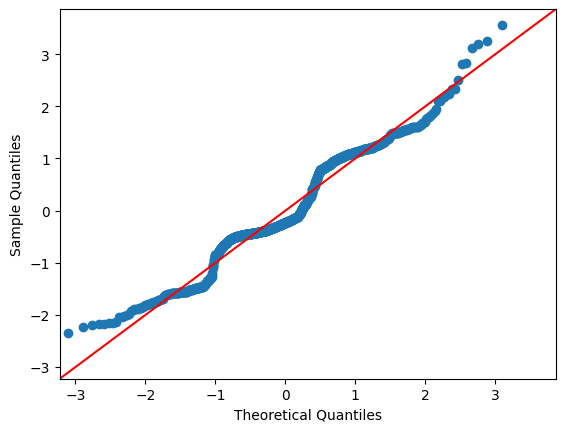

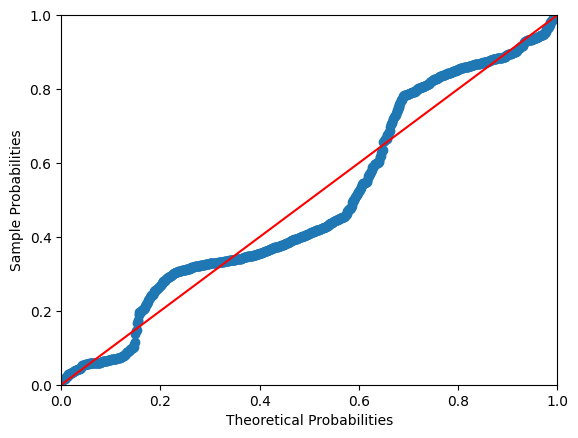

In [9]:

x = scaler.fit_transform(df[["USD"]])
df["USD"] = x[0:]
probplot_usd = sm.ProbPlot(df["USD"])
probplot_usd.qqplot(line="45")
probplot_usd.ppplot(line="45")
plt.show()



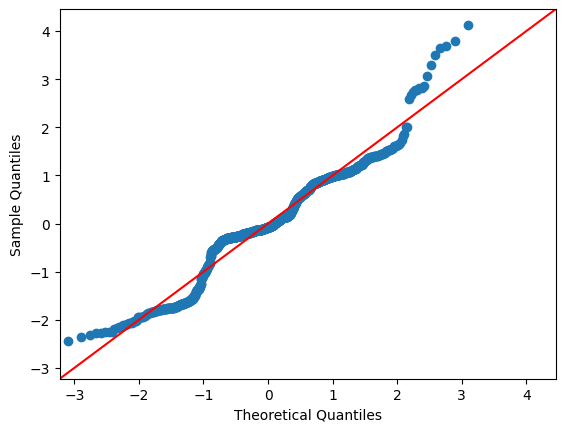

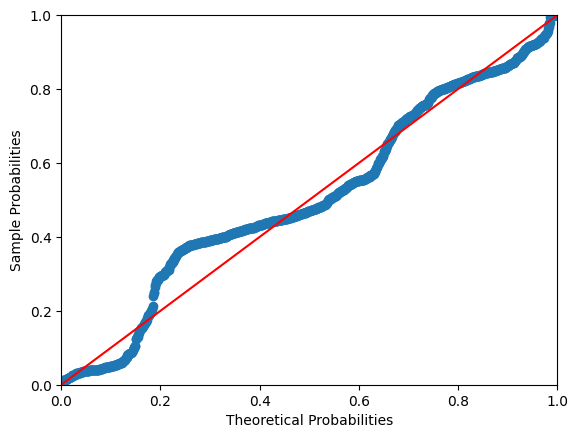

In [10]:
x = scaler.fit_transform(df[["CAD"]])
df["CAD"] = x[0:]
probplot_cad = sm.ProbPlot(df["CAD"])
probplot_cad.qqplot(line="45")
probplot_cad.ppplot(line="45")
plt.show()

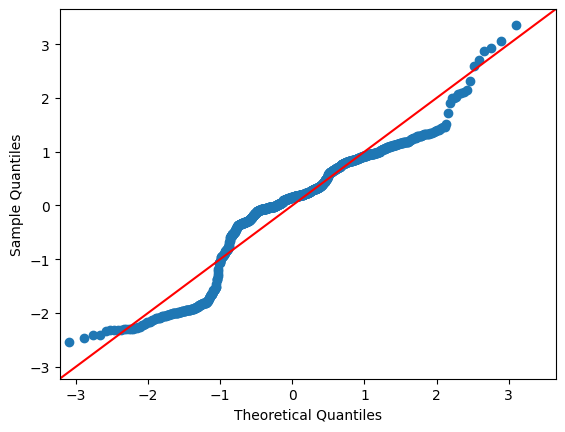

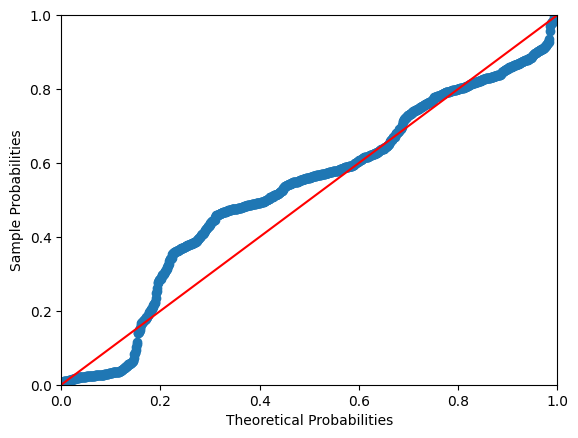

In [11]:
x = scaler.fit_transform(df[["EUR"]])
df["EUR"] = x[0:]
probplot_eur = sm.ProbPlot(df["EUR"])
probplot_eur.qqplot(line="45")
probplot_eur.ppplot(line="45")
plt.show()

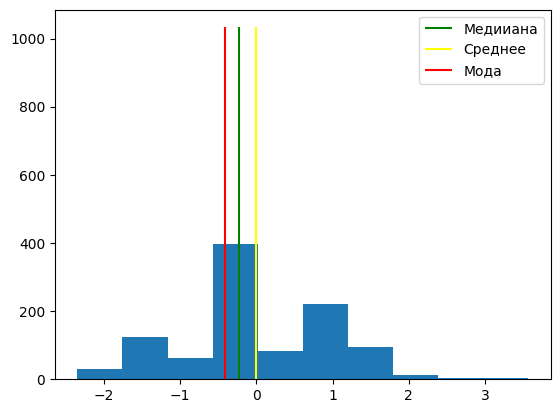

In [12]:
# TASK 4
plt.hist(df["USD"])
plt.vlines(df["USD"].median(),0,df["USD"].size,color="green",label="Медииана")
plt.vlines(df["USD"].mean(),0,df["USD"].size,color="yellow",label="Среднее")
plt.vlines(df["USD"].mode()[0],0,df["USD"].size,color="red",label="Мода")
plt.legend()

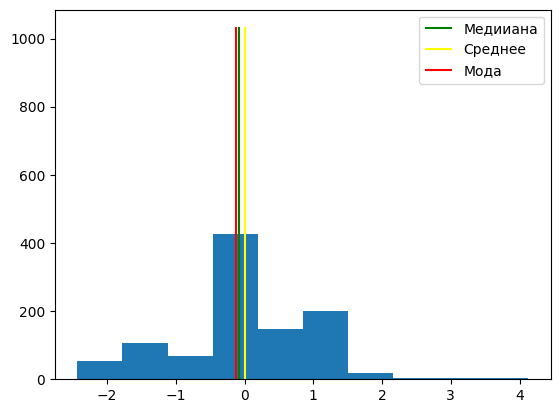

In [13]:
plt.hist(df["CAD"])
plt.vlines(df["CAD"].median(),0,df["CAD"].size,color="green",label="Медииана")
plt.vlines(df["CAD"].mean(),0,df["CAD"].size,color="yellow",label="Среднее")
plt.vlines(df["CAD"].mode()[0],0,df["CAD"].size,color="red",label="Мода")
plt.legend()

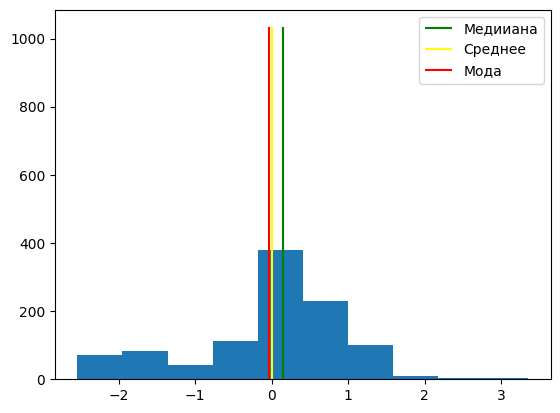

In [14]:
plt.hist(df["EUR"])
plt.vlines(df["EUR"].median(),0,df["EUR"].size,color="green",label="Медииана")
plt.vlines(df["EUR"].mean(),0,df["EUR"].size,color="yellow",label="Среднее")
plt.vlines(df["EUR"].mode()[0],0,df["EUR"].size,color="red",label="Мода")
plt.legend()

# Task 5

Выбор критерия нормальности делается в зависимости от выборки:
    7-2000 наблюдений – критерий Шапиро-Уилка 
    > 2000 наблюдений – подходят методы на основе эмпирической функции 
распределения (EDF):
- для большого числа отклонений в хвостах – критерий Андерсона-Дарлинга;
- для большого числа отклонений в середине – критерий Колмогорова-Смирнова

In [15]:
df["USD"].size

1033

In [16]:
# Применяем критерий Шапиро-Уилка
from scipy.stats import shapiro,norm
w_usd = shapiro(df["USD"])
w_cad = shapiro(df["CAD"])
w_eur = shapiro(df["EUR"])
print(f"USD : p-value= {w_usd[1]}")
print(f"CAD : p-value= {w_cad[1]}")
print(f"EUR : p-value= {w_eur[1]}")
# p-value мало везде, ни одно из распределений не является нормальнымa

USD : p-value= 2.850791451454492e-15
CAD : p-value= 1.8555600050920235e-16
EUR : p-value= 2.8416895312883873e-22


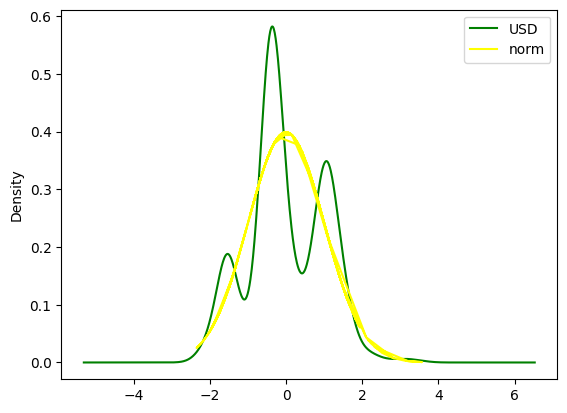

In [17]:
#df["CAD"].plot.kde(color="red",label="CAD")
df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["USD"],norm.pdf(df["USD"],df["USD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

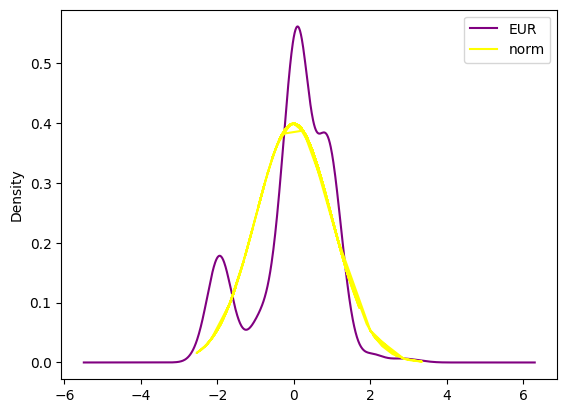

In [18]:
#df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["EUR"],norm.pdf(df["EUR"],df["EUR"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

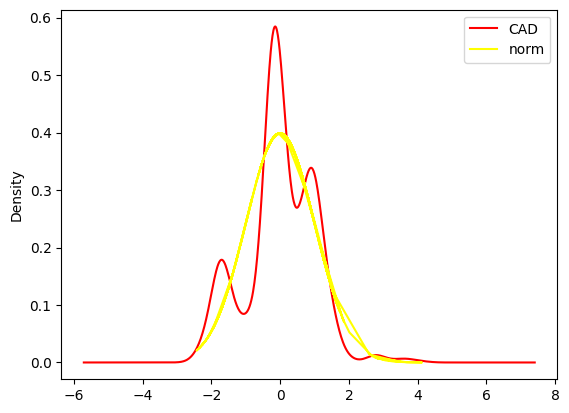

In [19]:
df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["CAD"],norm.pdf(df["CAD"],df["CAD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

<AxesSubplot:>

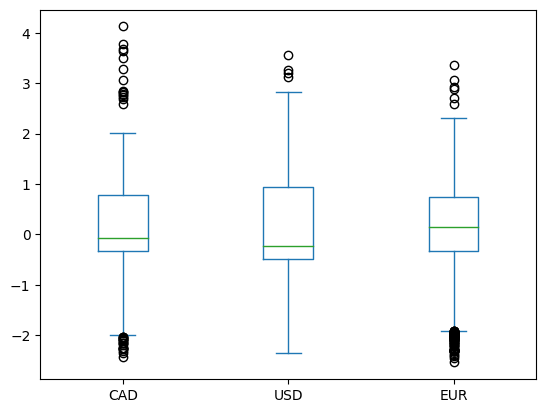

In [20]:
# TASK 6
df[["CAD","USD","EUR"]].plot.box()

In [21]:
x = df[df["CAD"] > df["CAD"].quantile(0.25)]
cad_filtered = x[x["CAD"] < x["CAD"].quantile(0.75)]


y = df[df["USD"] > df["USD"].quantile(0.25)]
usd_filtered = y[y["USD"] < y["USD"].quantile(0.75)]

z = df[df["EUR"] > df["EUR"].quantile(0.25)]
eur_filtered = z[z["EUR"] < z["EUR"].quantile(0.75)]



In [22]:
shapiro(usd_filtered["USD"])

ShapiroResult(statistic=0.8256304264068604, pvalue=1.2585902019947395e-24)

In [23]:
shapiro(eur_filtered["EUR"])

ShapiroResult(statistic=0.9434359669685364, pvalue=4.5766169310236873e-14)

In [24]:
shapiro(cad_filtered["CAD"])

ShapiroResult(statistic=0.8655522465705872, pvalue=6.6339198502220915e-22)

<AxesSubplot:>

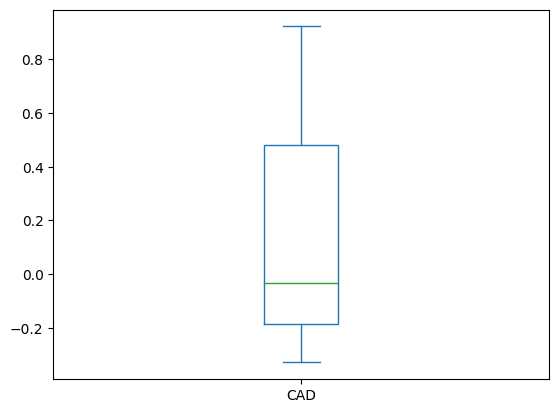

In [25]:
cad_filtered["CAD"].plot.box()

<AxesSubplot:>

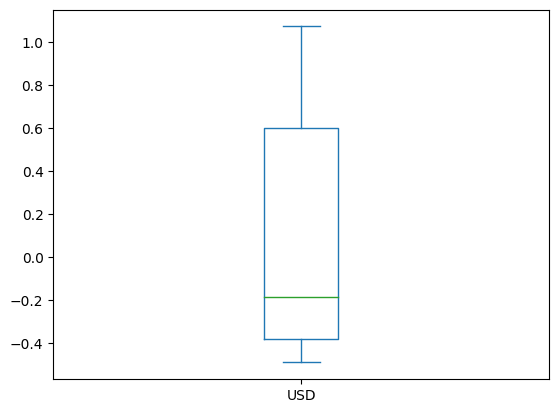

In [26]:
usd_filtered["USD"].plot.box()

<AxesSubplot:>

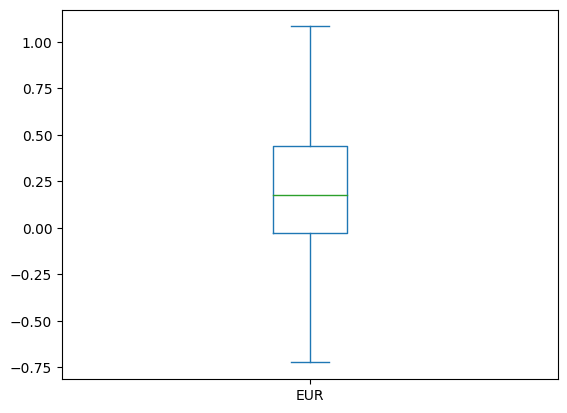

In [27]:
usd_filtered["EUR"].plot.box()

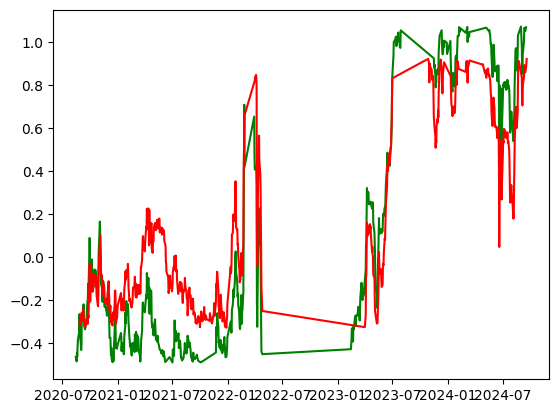

In [28]:
# TASK 7
plt.plot(usd_filtered["data"],usd_filtered["USD"], color="green")
plt.plot(cad_filtered["data"],cad_filtered["CAD"], color="red")

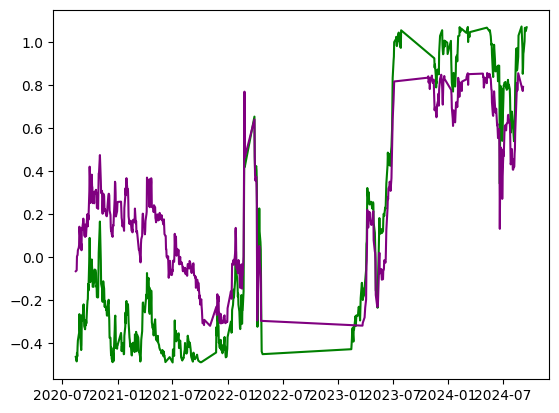

In [29]:
# TASK 7
plt.plot(usd_filtered["data"],usd_filtered["USD"], color="green")
plt.plot(eur_filtered["data"],eur_filtered["EUR"], color="purple")

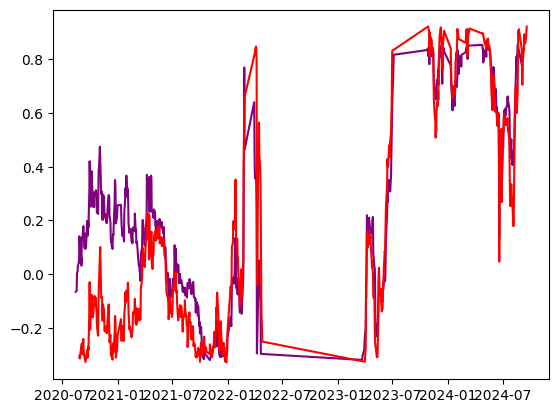

In [30]:
# TASK 7
plt.plot(eur_filtered["data"],eur_filtered["EUR"], color="purple")
plt.plot(cad_filtered["data"],cad_filtered["CAD"], color="red")

In [31]:
#Task 8
from scipy.stats import pearsonr,spearmanr,kendalltau

In [32]:
pr1 = pearsonr(usd_filtered["USD"],cad_filtered["CAD"])
sp1 = spearmanr(usd_filtered["USD"],cad_filtered["CAD"])
k1 = kendalltau(usd_filtered["USD"],cad_filtered["CAD"])
print(pr1)
print(sp1)
print(k1)

PearsonRResult(statistic=0.8555171158976821, pvalue=2.2993274543807677e-167)
SignificanceResult(statistic=0.7184498296719304, pvalue=3.4663239995435617e-93)
SignificanceResult(statistic=0.5251014689571458, pvalue=9.095792509375911e-80)


In [33]:
pr2 = pearsonr(usd_filtered["USD"],eur_filtered["EUR"])
sp2 = spearmanr(usd_filtered["USD"],eur_filtered["EUR"])
k2 = kendalltau(usd_filtered["USD"],eur_filtered["EUR"])
print(pr2)
print(sp2)
print(k2)

PearsonRResult(statistic=0.7906656737012746, pvalue=2.927051138226314e-125)
SignificanceResult(statistic=0.6559671591939847, pvalue=1.2196604327207867e-72)
SignificanceResult(statistic=0.4859491925683439, pvalue=1.3872657081080087e-68)


In [34]:
pr3 = pearsonr(usd_filtered["EUR"],cad_filtered["CAD"])
sp3 = spearmanr(usd_filtered["EUR"],cad_filtered["CAD"])
k3 = kendalltau(usd_filtered["EUR"],cad_filtered["CAD"])
print(pr3)
print(sp3)
print(k3)

PearsonRResult(statistic=0.6858452172504538, pvalue=8.101403251151916e-82)
SignificanceResult(statistic=0.627250212444007, pvalue=9.378512209990598e-65)
SignificanceResult(statistic=0.45918461543246375, pvalue=1.9576573865840316e-61)


In [35]:
## Нам подходит спирмен или кендалл
## корелляция есть и во всех случаях, прямая и достаточно сильная

In [42]:
temp = usd_filtered[["data","USD"]].set_index("data").join(eur_filtered[["data","EUR"]].set_index("data"))

In [44]:
pooled = temp.join(cad_filtered[["data","CAD"]].set_index("data"))

In [47]:
pooled.dropna(subset=["EUR","USD","CAD"],inplace=True)

<AxesSubplot:xlabel='USD', ylabel='EUR'>

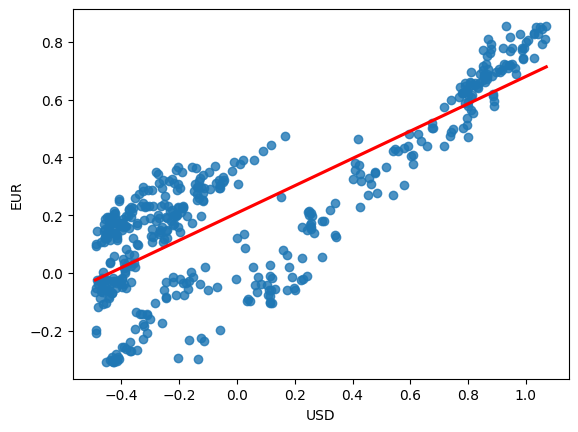

In [55]:
import seaborn as sns
sns.regplot(data=pooled,x="USD",y="EUR",line_kws={"color":"red"})

<AxesSubplot:xlabel='USD', ylabel='CAD'>

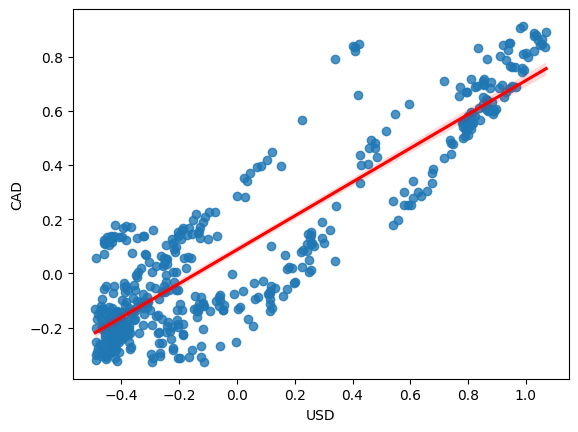

In [56]:
sns.regplot(data=pooled,x="USD",y="CAD",line_kws={"color":"red"})

<AxesSubplot:xlabel='EUR', ylabel='CAD'>

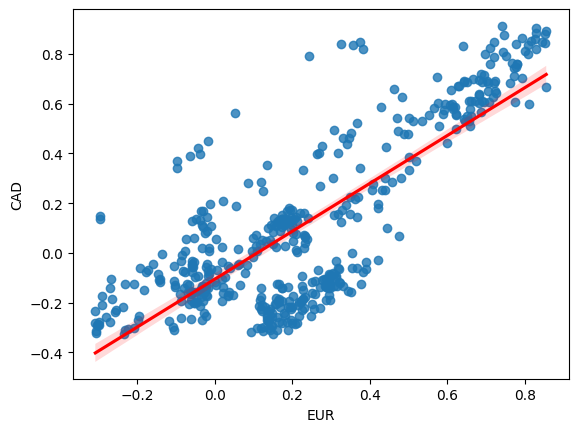

In [57]:
sns.regplot(data=pooled,x="EUR",y="CAD",line_kws={"color":"red"})